In [4]:
import pandas as pd
import numpy as np

In [5]:
EarlyDiaB_df = pd.read_csv("/kaggle/input/diabetes-datasets/Early_stage_diabetes_risk_prediction/Early_stage_diabetes_risk_prediction/diabetes_data_upload.csv")
KalyanDiaB_df = pd.read_csv("/kaggle/input/diabetes-datasets/KalyanM45/KalyanM45/diabetesdata_of_KalyanM45.csv")
NIDiaB_df = pd.read_csv("/kaggle/input/diabetes-datasets/National Institutes of Diabetes-Digestive-Kidney Diseases/National Institutes of Diabetes-Digestive-Kidney Diseases/diabetes.csv")
PimDiaB_df = pd.read_csv("/kaggle/input/diabetes-datasets/Pima Indians Diabetes Database/Pima Indians Diabetes Database/diabetes.csv")
UznDiaB_df = pd.read_csv("/kaggle/input/diabetes-datasets/UznetDev/UznetDev/diabetes_of_UznetDev.csv")

In [6]:
EarlyDiaB_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# 🩺 Dự án Dự đoán Nguy cơ Tiểu đường | Diabetes Risk Prediction Project

Dự án này thực hiện phân tích và dự đoán nguy cơ mắc bệnh tiểu đường dựa trên hai khía cạnh: Chỉ số sinh hóa và Triệu chứng lâm sàng.
*This project analyzes and predicts the risk of diabetes based on two aspects: Biochemical indicators and Clinical symptoms.*

---

## 📊 1. Giải thích các thuộc tính | Dataset Dictionary

Ý nghĩa chi tiết của các cột trong bộ dữ liệu triệu chứng (`diabetes_data_upload.csv`):  
*Detailed meanings of columns in the symptom dataset (`diabetes_data_upload.csv`):*

| Thuộc tính (Feature) | Biểu tượng | Ý nghĩa y khoa (Medical Meaning) |
| :--- | :---: | :--- |
| **Age** | 🎂 | **Tuổi**: Tuổi của bệnh nhân (20 - 90). <br> *The age of the patient (20 - 90).* |
| **Gender** | 🚻 | **Giới tính**: Nam (Male) hoặc Nữ (Female). <br> *Gender of the patient.* |
| **Polyuria** | 🚽 | **Chứng tiểu nhiều**: Đi tiểu quá mức hoặc thường xuyên. <br> *Excessive or frequent urination.* |
| **Polydipsia** | 💧 | **Chứng khát nhiều**: Cảm giác cực kỳ khát nước. <br> *Excessive thirst despite drinking water.* |
| **Sudden weight loss**| 📉 | **Sụt cân đột ngột**: Giảm cân nhanh không rõ lý do. <br> *Unexplained rapid weight loss.* |
| **Weakness** | 😫 | **Mệt mỏi**: Cảm giác kiệt sức, thiếu năng lượng. <br> *Generalized feeling of exhaustion.* |
| **Polyphagia** | 🍽️ | **Chứng thèm ăn**: Cảm giác nhanh đói và ăn quá nhiều. <br> *Excessive hunger and overeating.* |
| **Genital thrush** | 🦠 | **Nấm bộ phận sinh dục**: Một dạng nhiễm trùng nấm men. <br> *A type of yeast infection.* |
| **Visual blurring** | 👓 | **Mắt mờ**: Thị lực giảm sút, nhìn không rõ. <br> *Impaired or unclear vision.* |
| **Itching** | 😖 | **Ngứa**: Cảm giác ngứa ngáy khó chịu trên da. <br> *Uncomfortable itching sensation on the skin.* |
| **Irritability** | 💢 | **Cáu gắt**: Dễ trở nên khó chịu, thay đổi tâm trạng. <br> *Feeling easily annoyed or mood swings.* |
| **Delayed healing** | 🩹 | **Vết thương lâu lành**: Khả năng hồi phục vết loét chậm. <br> *Slow recovery from cuts or sores.* |
| **Partial paresis** | 🚶 | **Liệt nhẹ**: Suy yếu một phần các nhóm cơ. <br> *Partial weakness of a group of muscles.* |
| **Muscle stiffness** | 🧗 | **Căng cứng cơ**: Đau mỏi hoặc khó cử động cơ. <br> *Feeling of pain or difficulty moving muscles.* |
| **Alopecia** | 💇 | **Rụng tóc**: Tình trạng rụng tóc dẫn đến hói cục bộ. <br> *Hair loss resulting in bald patches.* |
| **Obesity** | ⚖️ | **Béo phì**: Trạng thái thừa cân theo chỉ số BMI. <br> *Being overweight based on Body Mass Index.* |
| **Class** | 🎯 | **Kết quả**: Positive (Có nguy cơ) / Negative (Không). <br> *Target label: Positive or Negative risk.* |

---

In [7]:
KalyanDiaB_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
NIDiaB_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
PimDiaB_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
UznDiaB_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<h3>Choosing the Pima datasets and Early stage dataset</h3>

In [11]:
EarlyDiaB_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [12]:
PimDiaB_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3>Processing Early state diabetes dataset</h3>

In [13]:
print(EarlyDiaB_df.columns.tolist())

['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


In [14]:
EarlyDiaB_df.shape

(520, 17)

In [15]:
EarlyDiaB_df.duplicated().sum()

np.int64(269)

In [16]:
duplicated_df = EarlyDiaB_df[EarlyDiaB_df.duplicated()]
duplicated_df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
84,35,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
159,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
160,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
161,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
162,35,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive
163,45,Female,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,Positive
164,48,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
165,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Yes,No,No,Positive
166,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,Positive
167,41,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Positive


In [17]:
duplicated_df2 = duplicated_df.sort_values(by=list(duplicated_df.columns))
duplicated_df2.tail(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
463,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
472,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
187,72,Male,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Positive
185,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
186,90,Female,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Positive


In [18]:
duplicated_df2.shape

(269, 17)

In [19]:
EarlyDiaB_df.sort_values(by=list(EarlyDiaB_df.columns)).tail(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
113,79,Male,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Positive
101,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
185,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
102,90,Female,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Positive
186,90,Female,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Positive


In [20]:
EarlyDiaB_df.drop_duplicates(inplace=True)

In [21]:
EarlyDiaB_df.shape

(251, 17)

In [22]:
EarlyDiaB_df['Age']

0      40
1      58
2      41
3      45
4      60
       ..
515    39
516    48
517    58
518    32
519    42
Name: Age, Length: 251, dtype: int64

In [23]:
# Encoding the datasets
mapping = {
    'Yes':1, 'No':0,
    'Male':1, 'Female':0,
    'Positive':1, "Negative":0
}

#Encode all of columns except "age" column
cols_to_encode = EarlyDiaB_df.columns.drop("Age")
for col in cols_to_encode:
    EarlyDiaB_df[col] = EarlyDiaB_df[col].map(mapping)

EarlyDiaB_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [24]:
#check missing values
EarlyDiaB_df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [25]:
# Type casting to optimize memory usage and computation speed.
EarlyDiaB_df = EarlyDiaB_df.astype(int)
EarlyDiaB_df.dtypes

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object

In [26]:
EarlyDiaB_df['Age'].describe()

count    251.000000
mean      48.864542
std       12.526036
min       16.000000
25%       39.000000
50%       48.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64

<h3>EDA Datasets</h3>

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

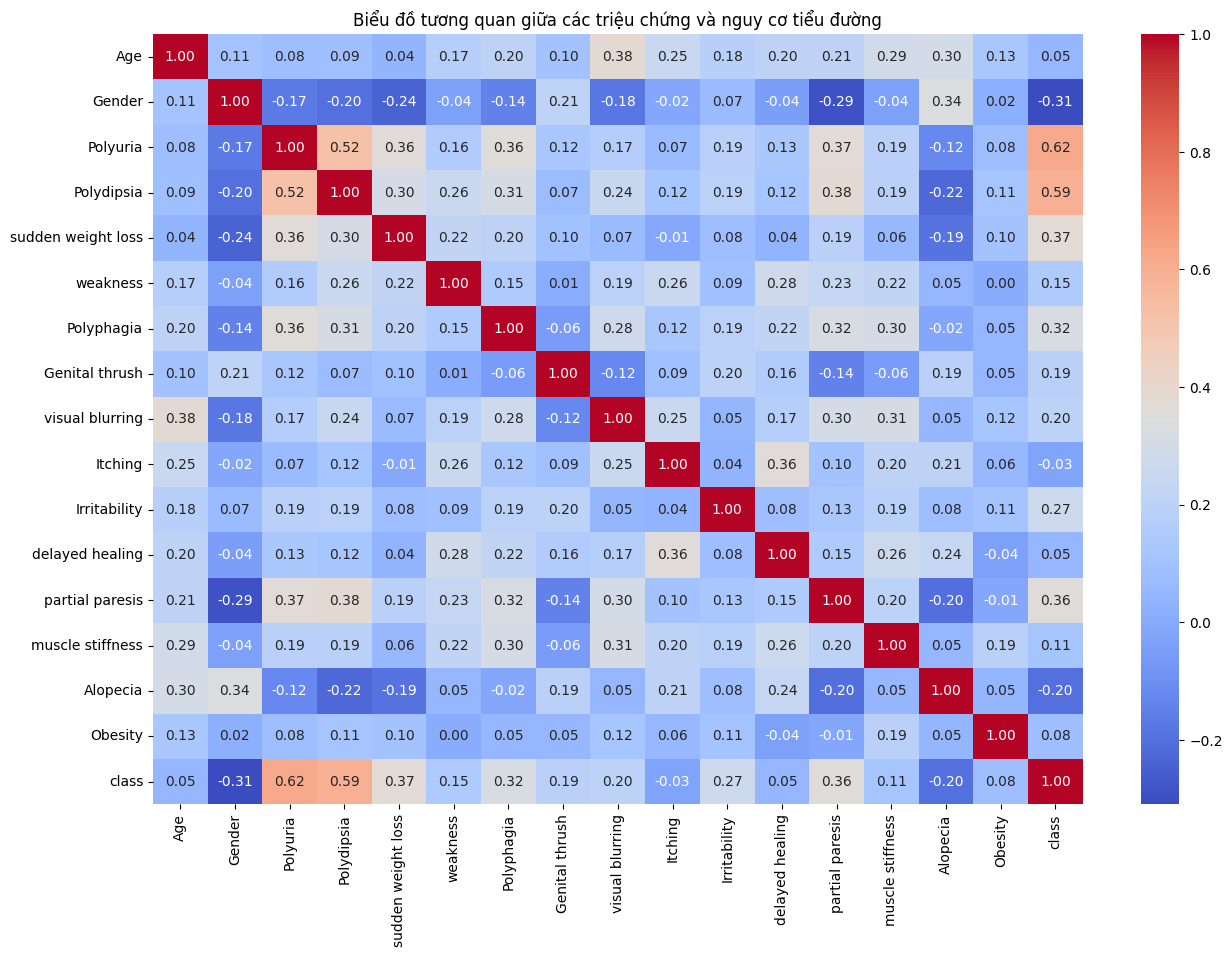

In [28]:
# Phân tích tương quan (Correlation Analysis)
plt.figure(figsize=(15,10))
sns.heatmap(EarlyDiaB_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Biểu đồ tương quan giữa các triệu chứng và nguy cơ tiểu đường')
plt.show()

Dựa trên biểu đồ tương quan của bộ dữ liệu Early stage Diabetes, biến mục tiêu `class` có mối liên hệ mật thiết nhất với chứng tiểu nhiều (Polyuria, 0.62) và chứng khát nhiều (Polydipsia, 0.59), trong khi các yếu tố như Gender (-0.31), rụng tóc (Alopecia, -0.2) hay ngứa (Itching, -0.03) lại cho thấy mức độ ảnh hưởng thấp hoặc tương quan nghịch.

**-> Kết luận:** Nguy cơ mắc bệnh tiểu đường trong tập dữ liệu này gắn liền chủ yếu với hai triệu chứng lâm sàng là khát nước (Polydipsia) và tiểu nhiều (Polyuria).
____
Based on the correlation plot of the Early Stage Diabetes dataset, the target variable `class` is most strongly associated with polyuria (0.62) and polydipsia (0.59), while factors such as Gender (-0.31), alopecia (-0.2), or itching (-0.03) show low influence or negative correlation.

**-> Conclusion**: The risk of developing diabetes in this dataset is primarily associated with two clinical symptoms: polydipsia and polyuria.

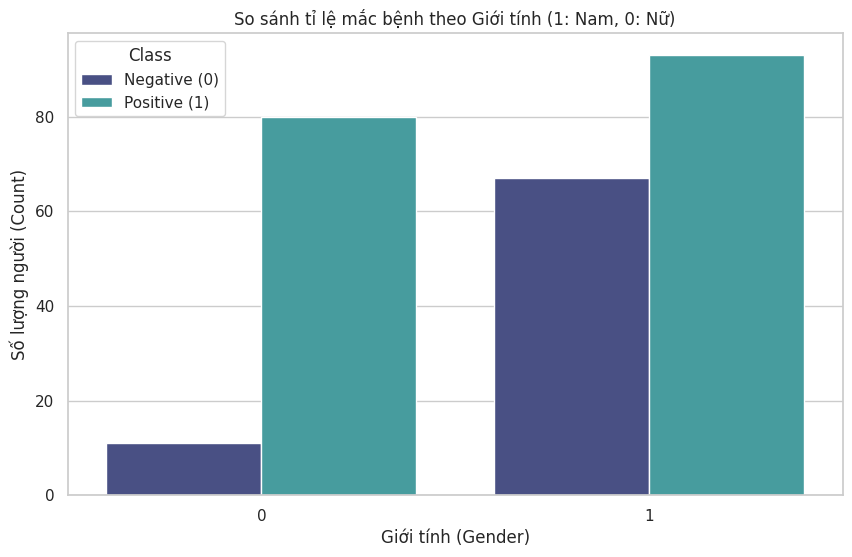

In [29]:
# So sánh đặc trưng theo Giới tính (Feature Analysis by Gender)
# Thiết lập phong cách cho biểu đồ
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# Vẽ biểu đồ đếm số lượng Positive/Negative theo Giới tính
# 1: Male, 0: Female | 1: Positive, 0: Negative
ax = sns.countplot(data=EarlyDiaB_df, x='Gender', hue='class', palette='mako')

# Tùy chỉnh nhãn để dễ đọc
plt.title('So sánh tỉ lệ mắc bệnh theo Giới tính (1: Nam, 0: Nữ)')
plt.xlabel('Giới tính (Gender)')
plt.ylabel('Số lượng người (Count)')
plt.legend(title='Class', labels=['Negative (0)','Positive (1)'])
plt.show()

Biểu đồ cho thấy dù số lượng Nam giới trong dữ liệu nhiều hơn, nhưng **tỉ lệ dương tính ở Nữ giới** lại áp đảo (cột Positive cao bất thường so với Negative).

> **-> Kết luận:** Khi đi khám bệnh, xác suất nữ giới mắc Diabetes cao hơn đáng kể so với nam giới.
________
The chart shows that although the number of men in the data is higher, the **positive rate in women** is overwhelmingly higher (the Positive column is unusually high compared to the Negative column).

> **-> Conclusion:** When seeking medical help, women have a significantly higher probability of having diabetes than men.

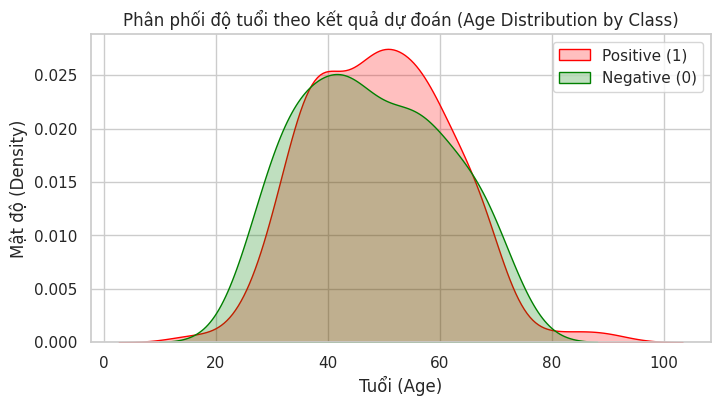

In [30]:
plt.figure(figsize=(8,4))

# Vẽ biểu đồ phân phối tuổi cho nhóm Positive và Negative
sns.kdeplot(data=EarlyDiaB_df[EarlyDiaB_df['class']==1]['Age'], label='Positive (1)',
            fill=True,color='red')
sns.kdeplot(data=EarlyDiaB_df[EarlyDiaB_df['class']==0]['Age'], label='Negative (0)',
            fill=True,color='green')

plt.title("Phân phối độ tuổi theo kết quả dự đoán (Age Distribution by Class)")
plt.xlabel("Tuổi (Age)")
plt.ylabel("Mật độ (Density)")
plt.legend()
plt.show()

Dữ liệu tập trung vào các nhóm tuổi chính:
*   **Nguy cơ cao nhất:** 40 - 60 tuổi.
*   **Nguy cơ thấp:** Dưới 35 tuổi.
*   **Ngoại lệ:** Vẫn ghi nhận các trường hợp trên 80 tuổi.

> **-> Kết luận:** Bệnh lý xuất hiện chủ yếu và có nguy cơ cao nhất ở độ tuổi trung niên.
_______  
Data focuses on key age groups:
* **Highest risk:** 40-60 years old.
* **Low risk:** Under 35 years old.
* **Exceptions:** Cases over 80 years old have still been recorded.  
>**-> Conclusion:** The disease primarily appears and has the highest risk in middle age.

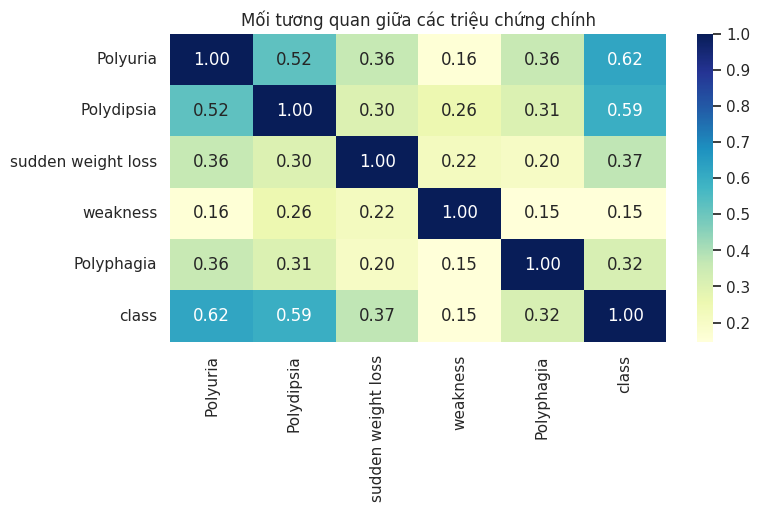

In [31]:
# Biểu đồ Symptom Clusters (Cụm triệu chứng đi kèm)
symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'class']
plt.figure(figsize=(8,4))
sns.heatmap(data=EarlyDiaB_df[symptoms].corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Mối tương quan giữa các triệu chứng chính")
plt.show()

Ngoài hai chỉ số dẫn đầu (>0.4) là Polyuria và Polydipsia, các biến như **Sudden weight loss (0.37)** và **Polyphagia (0.32)** cũng có đóng góp quan trọng.

> **-> Nhận xét:** Weakness (0.15) dù hệ số tương quan thấp nhưng là hệ quả cộng hưởng từ các triệu chứng khác gây suy giảm sức khỏe.
______
Besides the two leading indices (>0.4) of Polyuria and Polydipsia, variables such as **Sudden weight loss (0.37)** and **Polyphagia (0.32)** also made significant contributions.

> **-> Comment:** Weakness (0.15), despite its low correlation coefficient, is a cumulative consequence of other symptoms causing health deterioration.

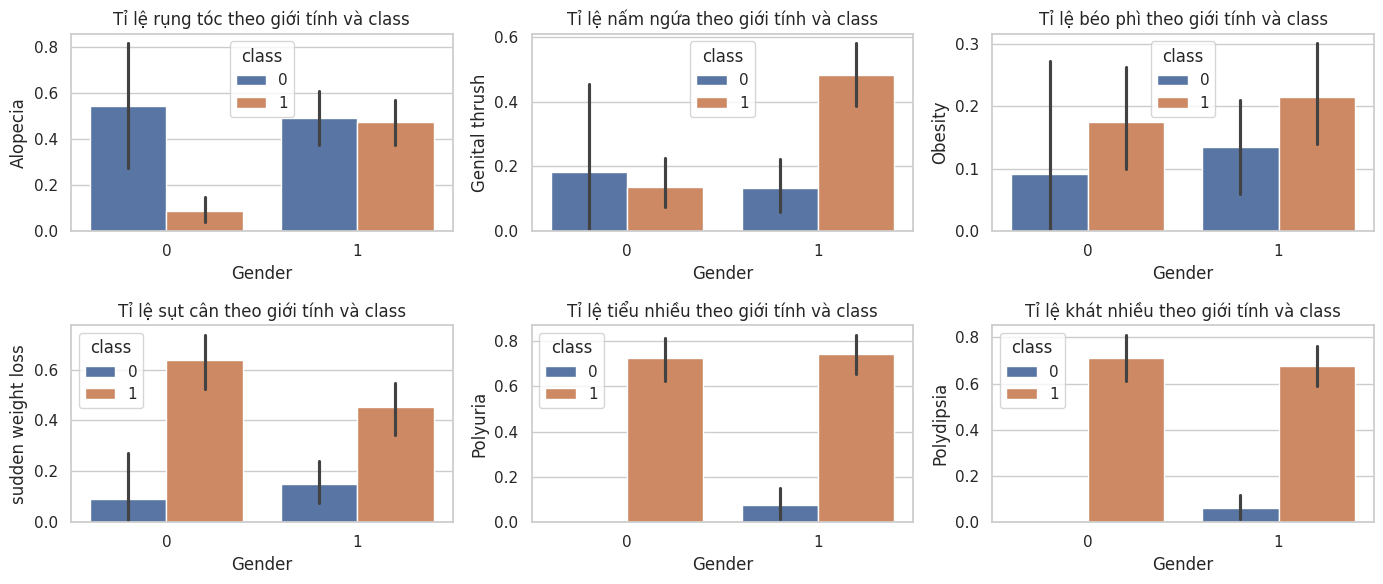

In [32]:
# Tỉ lệ triệu chứng theo giới tính (Symptoms Prevalence by Gender)
# Phân tích xem triệu chứng rụng tóc (Alopecia) và ngứa (Itching) khác nhau thế nào giữa 2 giới
fig, axes = plt.subplots(2, 3, figsize=(14,6))
axes = axes.flatten()

sns.barplot(data=EarlyDiaB_df, x='Gender', y='Alopecia', hue='class', ax=axes[0])
axes[0].set_title('Tỉ lệ rụng tóc theo giới tính và class')

sns.barplot(data=EarlyDiaB_df, x="Gender", y="Genital thrush", hue='class', ax=axes[1])
axes[1].set_title("Tỉ lệ nấm ngứa theo giới tính và class")

sns.barplot(data=EarlyDiaB_df, x='Gender', y='Obesity', hue='class', ax=axes[2])
axes[2].set_title("Tỉ lệ béo phì theo giới tính và class")

sns.barplot(data=EarlyDiaB_df, x='Gender', y='sudden weight loss', hue='class', ax=axes[3])
axes[3].set_title("Tỉ lệ sụt cân theo giới tính và class")

sns.barplot(data=EarlyDiaB_df, x='Gender', y='Polyuria', hue='class', ax=axes[4])
axes[4].set_title("Tỉ lệ tiểu nhiều theo giới tính và class")

sns.barplot(data=EarlyDiaB_df, x='Gender', y='Polydipsia', hue='class', ax=axes[5])
axes[5].set_title('Tỉ lệ khát nhiều theo giới tính và class')

plt.tight_layout()
plt.show()

Phân tích sâu sự khác biệt giữa các nhóm:
*   **Theo giới tính:** Nam giới bị tiểu đường rụng tóc (**Alopecia**) nhiều hơn và dễ gặp tình trạng nấm ngứa (**Genital thrush**) nhất.
*   **Theo bệnh lý:** Tỉ lệ Béo phì ngang nhau giữa hai giới. Các triệu chứng *Sụt cân, Tiểu nhiều, Khát nhiều* gắn liền trực tiếp với bệnh lý thay vì giới tính.
_______
In-depth analysis of differences between groups:
* **By gender:** Men with diabetes experience more hair loss (**Alopecia**) and are more prone to fungal infections (**Genital thrush**).

* **By disease:** Obesity rates are similar between the two sexes. Symptoms such as weight loss, frequent urination, and excessive thirst are directly linked to the disease rather than gender.

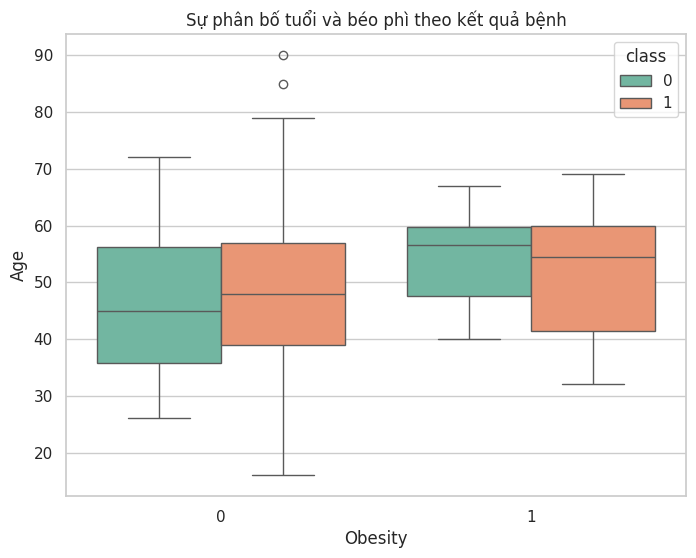

In [33]:
# Biểu đồ tác động béo phì theo độ tuổi (Obesity impact across age groups)

plt.figure(figsize=(8,6))
sns.boxplot(data=EarlyDiaB_df, x='Obesity', y='Age', hue='class', palette='Set2')
plt.title("Sự phân bố tuổi và béo phì theo kết quả bệnh")
plt.show()

*   **Nhóm Béo phì:** Thường mắc bệnh ở độ tuổi **32 - 70**.
*   **Nhóm Không béo phì:** Tỉ lệ mắc bệnh cao hơn rất nhiều, độ tuổi trải dài từ **16 - 90** (tập trung 40-55).

> **-> Nguyên nhân:** Điều này liên hệ mật thiết với biến **Sụt cân**. Bệnh càng nặng gây sụt cân càng nhanh, khiến người bệnh chuyển dịch từ nhóm béo phì sang nhóm không béo phì.
______
* **Obese Group:** Typically develops the disease between the ages of **32-70**.

* **Non-Obese Group:** The incidence is much higher, with ages ranging from **16-90** (concentrated 40-55).

> **-> Cause:** This is closely related to the **weight loss** variable. The more severe the disease, the faster the weight loss, causing patients to shift from the obese group to the non-obese group.

<h3>Applying Machine Learning Model</h3>

<h3>Applying XGBoost model</h3>

In [34]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
# Tách và chia dữ liệu
X = EarlyDiaB_df.drop('class',axis=1)
Y = EarlyDiaB_df['class']

# Chia dữ liệu 80% / 20%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Số mẫu dùng để train {len(X_train)}")
print(f"Số mẫu dùng để test {len(X_test)}")

Số mẫu dùng để train 200
Số mẫu dùng để test 51


In [36]:
# Khởi tạo model
xgb_model = XGBClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 5,
    random_state = 42,
    use_label_encoder = False,
    eval_metric = 'logloss'
)

# Training model
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:14:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [60]:
# Test model
y_pred = xgb_model.predict(X_test)

# The result
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

print()
print("----- Detail Report -------")
print(classification_report(y_test, y_pred))

Accuracy: 0.9019607843137255

----- Detail Report -------
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.89      0.97      0.93        35

    accuracy                           0.90        51
   macro avg       0.91      0.86      0.88        51
weighted avg       0.90      0.90      0.90        51



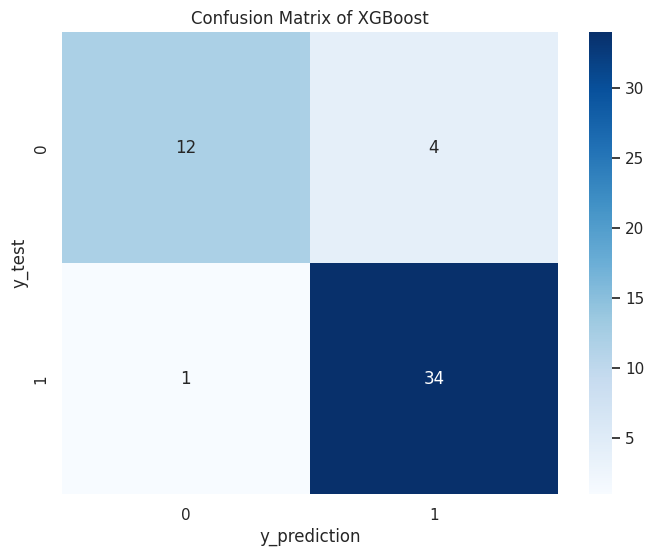

In [38]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(data = confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap="Blues")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.title("Confusion Matrix of XGBoost")
plt.show()

<h3>Applying Random Forest model</h3>

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)

# Train
rf_model.fit(X_train, y_train)

# Test
y_pred_rf = rf_model.predict(X_test)

In [41]:
# The result
print(f"Accuracy score: {accuracy_score(y_pred, y_test)}")
print("-----Details Report-----")
print(classification_report(y_test, y_pred_rf))

Accuracy score: 0.9019607843137255
-----Details Report-----
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.92      0.97      0.94        35

    accuracy                           0.92        51
   macro avg       0.92      0.89      0.91        51
weighted avg       0.92      0.92      0.92        51



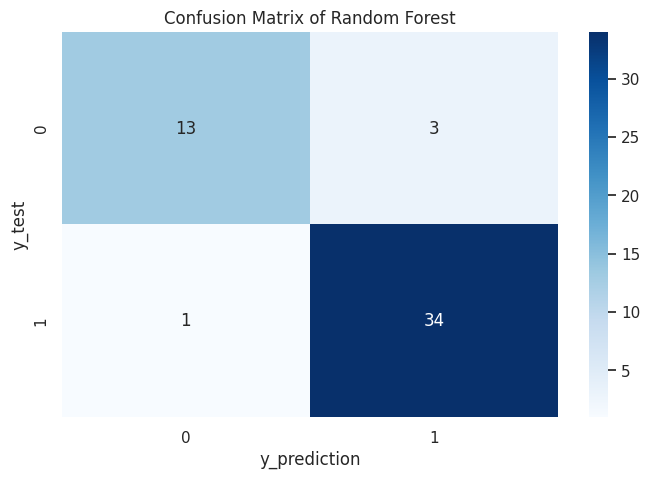

In [42]:
# Confussion Matrix
plt.figure(figsize=(8,5))
sns.heatmap(data = confusion_matrix(y_test, y_pred_rf), annot=True, fmt = 'd', cmap='Blues')
plt.title("Confusion Matrix of Random Forest")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

<h3>Applying Stacking Classifier model</h3>

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [44]:
# Base Models
base_models = [
    ('rf', rf_model),
    ('xgb', xgb_model)
]

# Meta Model: Logistic Regression thường được chọn làm trọng tài vì tính đơn giản và ổn định
meta_model = LogisticRegression()

# Initialize Stacking model
stacking_model = StackingClassifier(
    estimators = base_models,
    final_estimator = meta_model,
    cv = 5 # Cross-validation để tránh overfitting
)

stacking_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:14:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:14:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:14:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:14:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:14:30] WARNING: /w

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=Non...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression())

In [45]:
# Prediction
y_pred_stack = stacking_model.predict(X_test)

In [46]:
# The Results
print(f"Accuracy score: {accuracy_score(y_pred, y_test)}")
print("-----Details Report------")
print(classification_report(y_test, y_pred_stack))

Accuracy score: 0.9019607843137255
-----Details Report------
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.89      0.97      0.93        35

    accuracy                           0.90        51
   macro avg       0.91      0.86      0.88        51
weighted avg       0.90      0.90      0.90        51



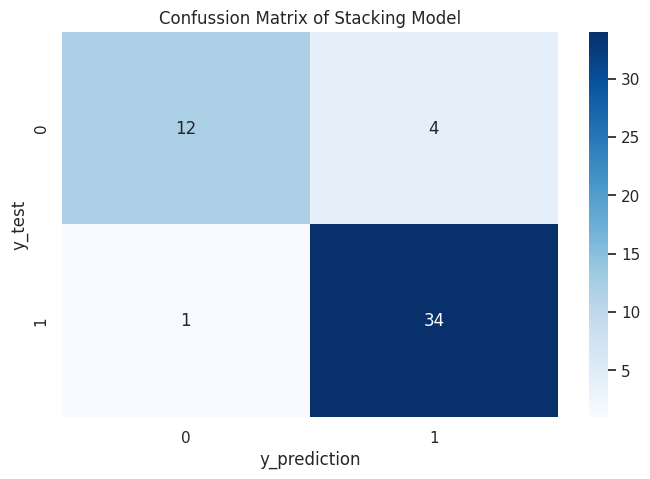

In [47]:
# The Confussion Matrix
plt.figure(figsize=(8,5))
sns.heatmap(data = confusion_matrix(y_test, y_pred_stack), annot = True, fmt = 'd', cmap='Blues')
plt.title("Confussion Matrix of Stacking Model")
plt.xlabel('y_prediction')
plt.ylabel('y_test')
plt.show()

<h3>Applying Deep Learning:  Multilayer Perceptron (MLP)</h3>

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Initialize
scaler = StandardScaler()

In [57]:
# Chuẩn hóa các tập X
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


# Initialize MLP
mlp_model = MLPClassifier(
    hidden_layer_sizes = (64,32),
    activation = 'relu',
    solver = 'adam',
    max_iter = 1000,
    random_state = 42
)

# Training
mlp_model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [58]:
y_pred_mlp = mlp_model.predict(X_test_scaled)

# The Result
print(f"Accuracy score: {accuracy_score(y_test,y_pred_mlp)}")
print("------Details Report-------")
print(classification_report(y_test,y_pred_mlp))

Accuracy score: 0.9215686274509803
------Details Report-------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.94      0.94      0.94        35

    accuracy                           0.92        51
   macro avg       0.91      0.91      0.91        51
weighted avg       0.92      0.92      0.92        51



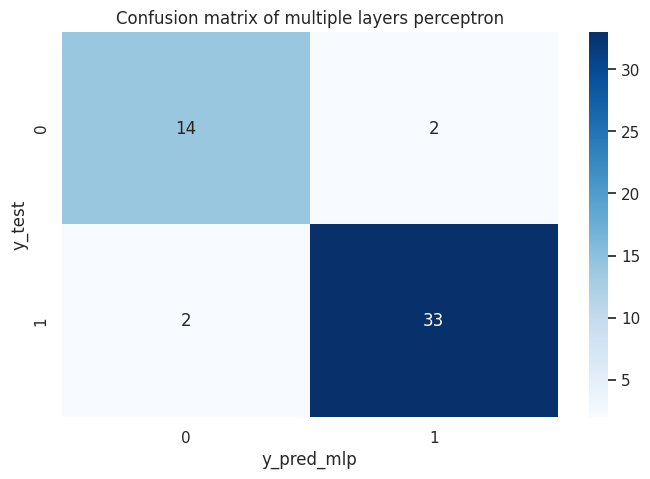

In [59]:
# Confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(data=confusion_matrix(y_test,y_pred_mlp), annot = True, fmt = 'd', cmap='Blues')
plt.title('Confusion matrix of multiple layers perceptron')
plt.xlabel('y_pred_mlp')
plt.ylabel('y_test')
plt.show()